# Data Visualization with Python

**Objectives**

- Review `matplotlib` fundamentals
- Use `subplots` with `figure` and `axes` objects
- Plot directly from `DataFrame`



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
sac = pd.read_csv('data/sacramento_real_estate_transactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
sac['sq__ft'].mean() + 1.5*sac['sq__ft'].std()

2597.1036181043837

In [7]:
sac['sq__ft'].mean() - 1.5*sac['sq__ft'].std()

28.73394534739259

In [11]:
#sac.loc[(sac['sq__ft'] < (sac['sq__ft'].mean() + 1.5*sac['sq__ft'].std())) or
#(sac['sq__ft'] > (sac['sq__ft'].mean() - 1.5*sac['sq__ft'].std()))]

### Anatomy of a `matplotlib` figure

[code](https://matplotlib.org/3.3.1/gallery/showcase/anatomy.html)
<center>
<img src = https://matplotlib.org/3.3.1/_images/sphx_glr_anatomy_001.png height = 200 width = 400/>
</center>

In [12]:
#define a quadratic function
def f(x): return x**2

In [13]:
#determine a domain (-3, 3)
x = np.linspace(-3, 3, 100)
x[-5:]

array([2.75757576, 2.81818182, 2.87878788, 2.93939394, 3.        ])

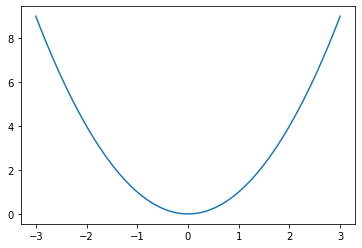

In [15]:
#plot 
plt.plot(x, f(x));

### Interacting with the figure *and* axes object 

```python
fig, ax = plt.subplots()
```

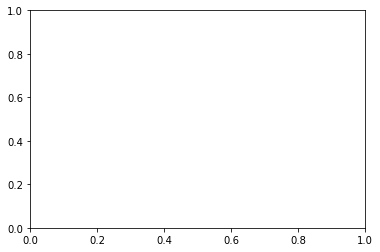

In [16]:
###create the figure and axis
fig, ax = plt.subplots()

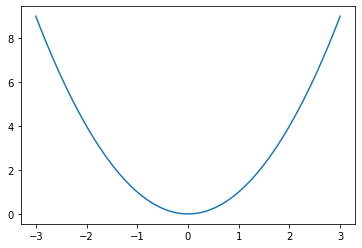

In [20]:
###plot to the axis
fig, ax = plt.subplots()
ax.plot(x, f(x));

### Subplots

In addition to exposing the figure and axes objects, the subplots will produce multiple axes objects on a figure.  These will be an array of axes objects if we enter a shape argument for the arangement of rows and columns in the subplots.

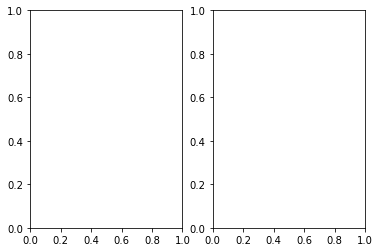

In [21]:
###subplots 1 row 2 columns
fig, ax = plt.subplots(nrows = 1, ncols = 2)

In [22]:
#examine the ax object
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae93e05e50>,
      dtype=object)

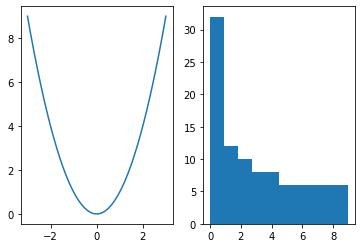

In [26]:
#now plot to each
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, f(x))
ax[1].hist(f(x));

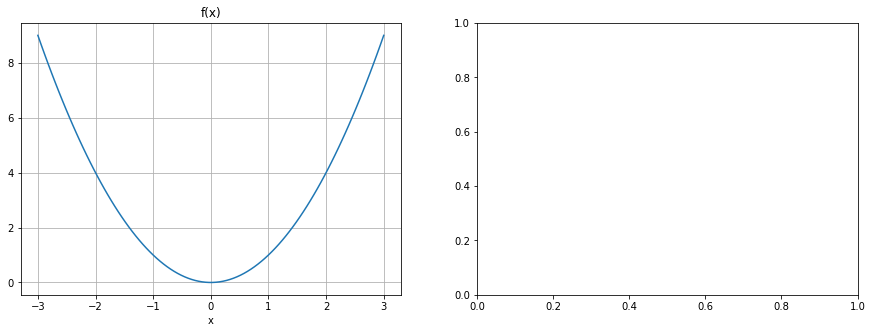

In [30]:
#control the figure size
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
#plot to the first axis
ax[0].plot(x, f(x))
ax[0].set_xlabel('x')
ax[0].set_title('f(x)')
ax[0].grid()

### Problems

1. Load the `bank-full.csv` file from the data folder into a `DataFrame`.  
2. Create a 2 column 1 row plot with:
 - a histogram of `age` on one plot
 - a histogram of `balance` on the second.
3. Create a 1 column 3 row plot with:
 - a scatterplot of `balance` vs. `age`
 - an `age` boxplot
 - a bar plot of counts of the `marital` feature

In [31]:
vehicle = pd.read_csv('data/bank-full.csv', sep = ';')

In [32]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
type(vehicle['marital'].value_counts())

pandas.core.series.Series

In [40]:
married = vehicle['marital'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


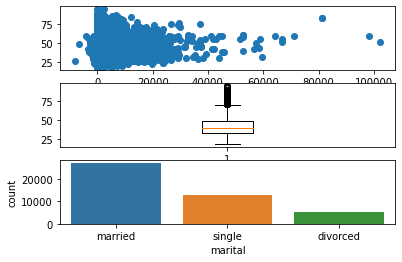

In [50]:
fig, ax = plt.subplots(3, 1)
# ax[2].bar(married.index, married.values)
#method 2 -- plotting right from the dataframe
ax[0].scatter(vehicle['balance'], vehicle['age'])
ax[1].boxplot(vehicle['age'])
# vehicle['marital'].value_counts().plot(kind = 'bar', ax = ax[2])
sns.countplot(vehicle['marital'], ax = ax[2])

In [44]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


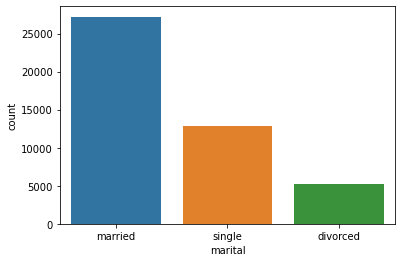

In [45]:
sns.countplot(vehicle['marital'])

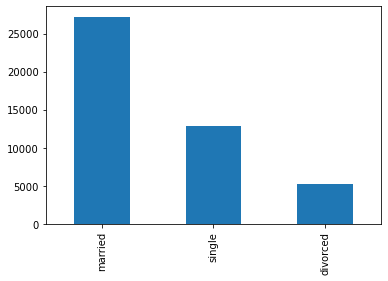

In [42]:
vehicle['marital'].value_counts().plot(kind = 'bar')